# K-Means Clustering 

##### 1. Select K random points
##### 2. Calculate the centroid of all points and assign points to the nearest centroid
##### 3. Repeat till convergence

# How does K-Means actually work?

#### Firstly, we identify some initial clusters (these can be random). We start by observing one of the clusters, if the distance between the observation and its closest cluster is greater than the other's closest cluster, the observation will replace the cluster centre depending on which one is closer to the observation

#### Each observation is allocated to the closest cluster and the distance between an observation and the closest cluster is calculated via Euclidean ditance between the observation and the nearest cluster centre

#### Here is a link to a very thorough explanation of how K-Means Clustering works under the hood. Link: https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/

### First we need to choose the number of clusters that we need. In the previous repository, we applied the 'Elbow Method' to find the optimal 'K' value. The optimal 'K' value will be marked by the best WCSS value

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('family.csv')

In [3]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
df.isnull()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
## We're only interested in the 'Total Household Income' and 'Meat Expenditure'
X = df.iloc[:, [0, 7]]
X.head()

,Total Household Income,Meat Expenditure
0,480332,24676
1,198235,17434
2,82785,7783
3,107589,10914
4,189322,18391


In [6]:
Z = X.iloc[:200] ## taking the first 200 rows of data
Z.head

<bound method NDFrame.head of      Total Household Income  Meat Expenditure
0                    480332             24676
1                    198235             17434
2                     82785              7783
3                    107589             10914
4                    189322             18391
5                    152883             15336
6                    198621             12968
7                    134961             14640
8                    171152             11464
9                    625753             26488
10                   147005             11174
11                   253130             20548
12                   101111             14322
13                   128214             10034
14                    91525              5430
15                   171742             10336
16                    95385             11226
17                   142843              9840
18                    88170              8048
19                    97018             10162
20  

#### PLEASE NOTE THE FOLLOWING CELL!
#### So I had to convert the dataframe into a numpy style array because it gave me the following error: '(array([False, .....]), 0) is an invalid key'

In [7]:
Y = Z.as_matrix()

C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


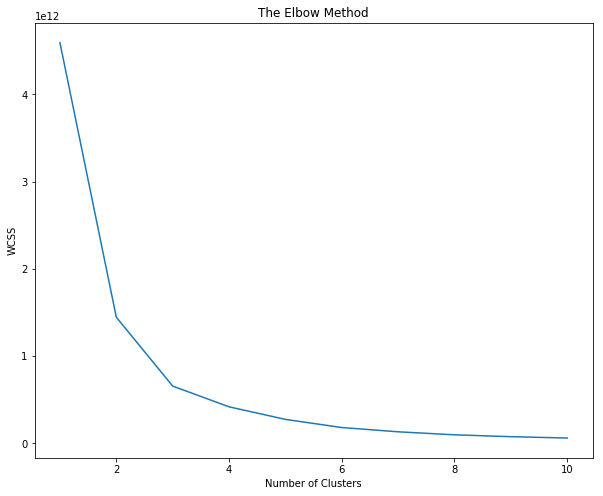

In [8]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(Y)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

#### From the above, the elbow seems to be at 3 clusters. For more information about judging which number to choose, check out this article on Medium: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

#### Another K-Means-Clustering project will be attempted later on, but instead I will apply the Silhoutte Method rather than the Elbow Method

In [9]:
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(Y)

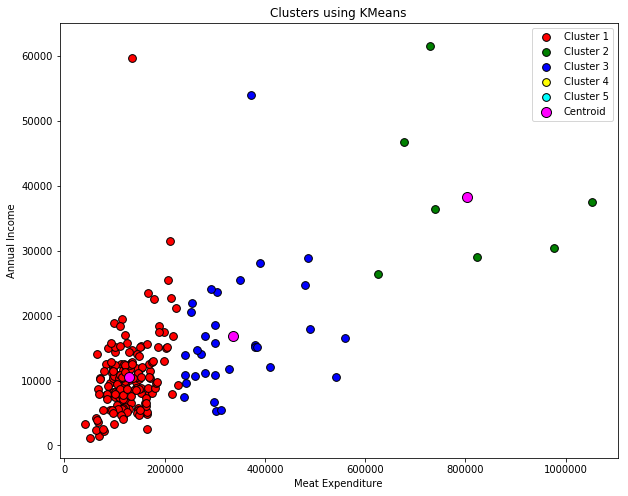

In [10]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(Y[y_kmeans == 4, 0], Y[y_kmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('Annual Income')
plt.xlabel('Meat Expenditure')
plt.show()